In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
#Based on Age and Salary we would like to predict if the customer shall purchase or not
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

In [4]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_true = train_test_split(x,y, test_size=0.25, random_state=101)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/Users/zohebabai/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
#Fitting Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 101)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
y_pred = classifier.predict(x_test)

In [9]:
#Let's check our results
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[57  8]
 [11 24]]
             precision    recall  f1-score   support

          0       0.84      0.88      0.86        65
          1       0.75      0.69      0.72        35

avg / total       0.81      0.81      0.81       100



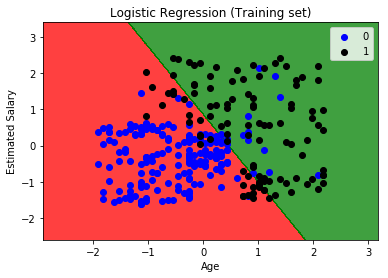

In [17]:
#Visulaising Training set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min() -1, stop = x_set[:,0].max() +1, step =0.01),
                     np.arange(start = x_set[:,1].min() -1, stop = x_set[:,1].max() +1, step =0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha =0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('blue', 'black'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

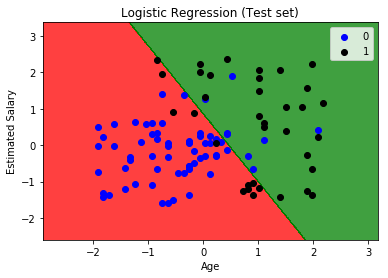

In [19]:
#Visulaising Test set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_true
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min() -1, stop = x_set[:,0].max() +1, step =0.01),
                     np.arange(start = x_set[:,1].min() -1, stop = x_set[:,1].max() +1, step =0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha =0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('blue', 'black'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Logistic Regression is a Linear Classifier